<a href="https://colab.research.google.com/github/Helsonfs/Estudos_data_science_cvirus/blob/main/Estudos_Data_Science_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [7]:
confirmados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
mortos = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recuperados = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [8]:
confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216,120216,120216,120216,125937,127464,129021,130113,131586,131586,131586
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958


In [9]:
confirmados.shape

(279, 541)

In [10]:
confirmados['Country/Region']

0             Afghanistan
1                 Albania
2                 Algeria
3                 Andorra
4                  Angola
              ...        
274               Vietnam
275    West Bank and Gaza
276                 Yemen
277                Zambia
278              Zimbabwe
Name: Country/Region, Length: 279, dtype: object

In [11]:
last_date = '7/11/21'

confirmados[last_date]

0      131586
1      132592
2      146064
3       14075
4       39958
        ...  
274     30478
275    315160
276      6948
277    175729
278     67765
Name: 7/11/21, Length: 279, dtype: int64

In [12]:
confirmados['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [13]:
confirmados.sample(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21
155,NaN,Japan,36.204824,138.252924,2,2,2,2,4,4,7,7,11,15,20,20,20,22,23,23,23,24,24,26,27,28,33,43,54,60,67,79,85,95,112,137,149,160,173,192,...,752865,755713,758290,760953,762980,764185,766068,768313,770357,772293,774240,775624,776565,777979,779696,781241,782877,784384,785702,786566,788009,789787,791452,793179,794805,796077,797084,798485,800305,802038,803812,805696,807180,808220,809909,812089,814319,816593,819051,821083
17,NaN,Azerbaijan,40.143100,47.576900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,334288,334416,334539,334647,334715,334747,334849,334917,334992,335065,335126,335171,335196,335264,335291,335339,335399,335437,335493,335521,335568,335625,335676,335741,335796,335836,335874,335961,336047,336122,336223,336318,336417,336479,336557,336684,336788,336962,337098,337254
182,NaN,Mauritius,-20.348404,57.552152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1418,1421,1421,1421,1458,1458,1458,1496,1496,1564,1566,1673,1701,1701,1701,1701,1701,1701,1701,1701,1701,1779,1779,1779,1833,1833,1833,1833,1833,1858,1858,1858,1858,1858,1858,1858,1858,1858,1858,1858
121,Guadeloupe,France,16.265000,-61.551000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16874,16874,16874,16874,17108,17108,17108,17108,17108,17108,17108,17288,17288,17288,17288,17288,17288,17288,17288,17427,17427,17427,17427,17427,17427,17427,17427,17539,17539,17539,17539,17539,17539,17684,17684,17684,17684,17684,17684,17684
133,NaN,Georgia,42.315400,43.356900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,346150,346983,347762,348594,349098,349405,350428,351249,351954,352649,353443,353965,354276,355368,356179,356920,357591,358360,358881,359141,360055,360828,361484,362183,362937,363522,363874,365068,366078,367058,368022,369048,369048,369886,371293,372685,373728,374836,376200,377152
189,NaN,Morocco,31.791700,-7.092600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,520028,520423,520769,521195,521426,521530,522003,522389,522765,523165,523620,523890,523999,524475,524975,525443,525924,526363,526651,526737,527174,527696,528180,528731,529224,529676,529895,530585,531361,532150,532994,533945,534550,534797,535974,537253,538589,539839,541405,542462
273,NaN,Venezuela,6.423800,-66.589700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,236755,238013,239252,240714,242138,243621,245300,246764,247847,248820,250309,251686,252883,254116,255457,256862,258140,259413,260740,262038,263372,263372,265642,266952,268349,269635,269635,270654,272712,274024,275205,276395,277635,278665,279813,280980,281907,282940,283742,283742
70,Hong Kong,China,22.300000,114.200000,0,2,2,5,8,8,8,10,10,12,13,15,15,17,21,24,25,26,29,38,49,50,53,56,56,57,60,62,63,68,68,69,74,79,84,91,...,11848,11849,11850,11851,11858,11865,11868,11872,11874,11874,11877,11877,11878,11880,11881,11881,11884,11885,11886,11889,11896,11898,11905,11909,11911,11917,11920,11921,11923,11927,11938,11939,11942,11943,11944,11945,11948,11949,11950,11951
234,NaN,Somalia,5.152149,46.199616,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14691,14699,14699,14729,14748,14768,14776,14779,14779,14779,14779,14817,14817,14823,14827,14841,14841,14852,14852,14867,14868,14868,14875,14875,14892,14892,14933,14933,14946,14946,14946,14946,14977,14977,149

In [17]:
confirmados.set_index('Province/State').loc['Anhui']

Country/Region      China
Lat               31.8257
Long              117.226
1/22/20                 1
1/23/20                 9
                   ...   
7/7/21               1008
7/8/21               1008
7/9/21               1008
7/10/21              1008
7/11/21              1008
Name: Anhui, Length: 540, dtype: object

In [18]:
confirmados.set_index('Province/State').iloc[1]

Country/Region    Albania
Lat               41.1533
Long              20.1683
1/22/20                 0
1/23/20                 0
                   ...   
7/7/21             132557
7/8/21             132565
7/9/21             132580
7/10/21            132587
7/11/21            132592
Name: nan, Length: 540, dtype: object

In [19]:
# valor palso pois é muito grande, não valos considerar essa análise pois há varios campos vazios (muita disparidade no padrão)

confirmados['Country/Region'].value_counts() 

China             34
Canada            16
United Kingdom    12
France            12
Australia          8
                  ..
Georgia            1
Latvia             1
Malawi             1
Moldova            1
Eritrea            1
Name: Country/Region, Length: 195, dtype: int64

In [22]:
confirmados_por_pais = confirmados.groupby('Country/Region').sum()
confirmados_por_pais.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216,120216,120216,120216,125937,127464,129021,130113,131586,131586,131586
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958


In [24]:
confirmados_por_pais.sample(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Eswatini,-26.522500,31.465900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18618,18623,18632,18636,18653,18664,18680,18694,18705,18723,18732,18736,18746,18754,18768,18784,18800,18811,18813,18831,18854,18898,18947,18989,19018,19035,19084,19084,19084,19084,19084,19084,19084,19084,19410,19522,19662,19779,19870,19918
Egypt,26.820553,30.802498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,264557,265489,266350,267171,267972,268754,269527,270292,271047,271780,272491,273182,273795,274404,275010,275601,276190,276756,277288,277797,278295,278761,279184,279596,280005,280394,280770,281031,281282,281524,281722,281903,282082,282257,282421,282582,282737,282864,282985,283102
Nigeria,9.082000,8.675300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,166560,166682,166730,166756,166767,166816,166918,166982,166982,167051,167059,167066,167078,167095,167103,167142,167155,167206,167206,167292,167331,167375,167401,167430,167465,167467,167532,167543,167618,167692,167732,167803,167859,167909,168000,168110,168256,168442,168540,168552
Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39031,39092,39144,39168,39189,39238,39321,39432,39496,39688,39852,39959,40077,40318,40556,40927,41335,41628,41779,42195,42714,43480,44306,45217,46018,46442,47284,48533,49864,51221,52663,53665,54474,56014,57963,60227,62383,65066,66853,67765
Uganda,1.373333,32.290275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,48676,49759,51006,51676,52935,53961,54669,55511,56949,58515,60250,61977,63099,64521,65631,67215,68779,70176,71543,72679,73401,74260,75537,76562,77505,78394,79089,79434,79977,81034,82082,82852,83636,84116,84554,84979,85581,86140,86755,87277
Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3882,3882,3886,3886,3888,3890,3890,3890,3894,3894,3899,3899,3901,3901,3905,3905,3905,3908,3908,3912,3912,3912,3912,3912,3912,3912,3912,3912,3936,3943,3957,3957,3958,3958,3958,3966,3976,3979,3983,3996
Taiwan*,23.700000,121.000000,1,1,3,3,4,5,8,8,9,10,10,10,10,11,11,16,16,17,18,18,18,18,18,18,18,20,22,22,23,24,26,26,28,30,31,32,32,34,...,9389,9974,10446,10956,11298,11491,11694,11968,12222,12500,12746,12921,13106,13241,13409,13584,13771,13896,14005,14080,14157,14260,14389,14465,14545,14634,14694,14748,14804,14853,14911,14991,15030,15061,15088,15128,15149,15185,15218,15249
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075
Syria,34.802075,38.996815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24559,24591,24619,24639,24659,24680,24700,24723,24743,24767,24789,24814,24860,24904,24946,24991,25035,25076,25118,25158,25205,25248,25287,25328,25365,25404,25442,25479,25515,25551,25586,25619,25653,25686,25712,25735,25753,25766,25766,25785


In [26]:
confirmados_por_pais.loc['China'][2:]

1/22/20       548.0
1/23/20       643.0
1/24/20       920.0
1/25/20      1406.0
1/26/20      2075.0
             ...   
7/7/21     103966.0
7/8/21     103992.0
7/9/21     104019.0
7/10/21    104020.0
7/11/21    104072.0
Name: China, Length: 537, dtype: float64

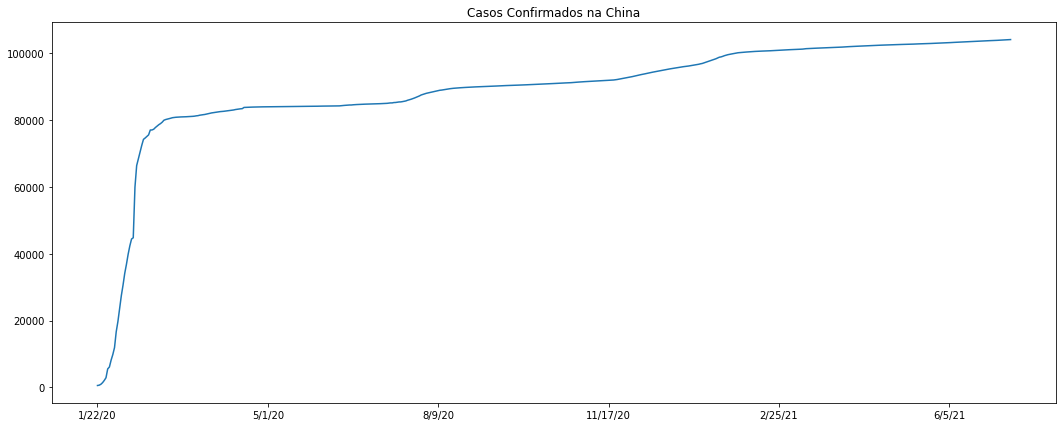

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,7))
confirmados_por_pais.loc['China'][2:].plot()
plt.title('Casos Confirmados na China')
plt.show()